# Merger_Rate_Fpbh

**References:** 


**Misao Sasaki :** [arXiv:1801.05235](https://arxiv.org/pdf/1801.05235.pdf) [arXiv:1603.08338v3](https://arxiv.org/pdf/1603.08338v3.pdf)

**Celoria :**  [arXiv:1807.11489](https://arxiv.org/pdf/1807.11489.pdf)

**Resources**
[Ley de probabilidad Poission](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L14/index.html#:~:text=The%20vast%20majority%20of%20astronomical,telescope%2C%20they%20are%20randomly%20spaced.&text=This%20random%20bunching%20of%20photons,is%20known%20as%20shot%20noise) , [Calc BH Colitions](https://www.omnicalculator.com/physics/black-hole)
[Raidal et al](https://arxiv.org/pdf/1812.01930.pdf),  [Hardi verm video 117](https://drive.google.com/file/d/1eKe2TcBLCMercIUHm5o5tlkkUxioFpH9/view) , [Slide Verm](https://agenda.infn.it/event/23799/contributions/120834/attachments/78936/102273/Veermae.pdf)

###### Code Writed by Tadeo D.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats 
import csv
from scipy import constants
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
from astropy import constants as const
import astropy.units as u
#from astropy.cosmology import WMAP9, z_at_value
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#pl.rcParams['figure.figsize'] = (16, 9)
#pl.style.use('ggplot')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#
#from mlxtend.plotting import plot_linear_regression
from sympy import *

In [2]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init=6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_c01 = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_R = 8.4e-5
Omega_lmb = 1-Omega_M - Omega_R
#print(Omega_DM,rho_c01, rho_c0.to(u.g/u.cm**3))
#print(G.to((u.pc*u.km**2)/(u.M_sun*u.s**2)))

e_prim = np.arange(0.01,1.0,0.01)
#print(((1/H0)*3.08e+19*u.km/u.megaparsec).to(u.Gyr))
#e = [0.5,  0.2,  0.1,  0.05,  0.01] #Excentricity array of datas
#e = 0.1 #Half
a_s = 0.01*u.AU#Half Separation
separation = a_s.to(u.m)
#a = [0.001, 0.01, 0.1, 1, 7.63] #Separation in AU, the last one is 1pc = 208232 UA
#omega_m = 0.321
#print(cosmo.Odm(0))
#print(cosmo.Odm(z_r))
#print(cosmo.Odm(z_eq))
#print(rho_c0.unit)
#print(rho_c0.to(u.kg/u.m**3),"\t\t\t", rho_c01)
#print(rho_c0.to(u.M_sun/u.m**3)*(Omega_DM)/(30*u.M_sun))
#G_N = G.to((u.pc*u.km**2)/(u.M_sun*u.s**2))
#h = 0.678
#H0 = (100.0*h)*(u.km/(u.megaparsec*u.s)) #(km/s) Mpc^-1
#Omega_DM = 0.1186/(h**2)
#rho = (3.0*H0**2/(8.0*np.pi*(G_N*1e-6))).to(u.M_sun/u.megaparsec**3)
#print(Omega_lmb)

### Merger event rate R per unit volume per unit time (at time t) is given by:

From this equation, we can express a as a function of t and e as a = a(t,e). Then, we can rewrite
the probability (140) as
$$dP = \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}a^{1/2}e(1-e^{2})^{-3/2}\frac{\partial{a}}{\partial{t}} dtde$$

Using: $$ a = \left(\frac{\mathcal{Q^{-1}}\;t}{(1-e^{2})^{7/2}}\right)^{\frac{1}{4}} \implies \frac{\partial{a}}{\partial{t}} = \frac{1}{4t}\left(\frac{Q^{-1}t}{(1-e^{2})^{7/2}}\right)^{\frac{1}{4}} = \frac{a (t,e)}{4t}$$

$$dP \;\;  =  \;\; \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}\frac{a^{3/2}}{4t}e(1-e^{2})^{-3/2}dtde \;\;\; = \;\;\;  \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}\frac{(\mathcal{Q}^{-1}\;t)^{3/8}}{4t}dt \int\limits_{0}^{e_{upper}}\frac{e}{(1-e^{2})^{45/16}}\;de $$

$$dP = \frac{3}{58}\left(\frac{t}{T}\right)^{\frac{3}{8}}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\frac{dt}{t} \;\;\;\;\;\;\;\;\;\; T = \mathcal{Q}\left(\frac{3y_{max}}{4 \pi f_{PBH} (1 + z_{eq})}\right)^{4} \;\;\;\;\;\; \mathcal{y}_{max} = \left(\frac{4\pi}{3}n_{PBH}\right)^{-1/3} $$

$$dP = \frac{3}{58}T^{-3/8}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\int\limits_{0}^{t}\frac{dt}{t^{5/8}}$$

$$\mathcal{R} = n_{PBH}\frac{dP}{dt} = \frac{3n_{PBH}}{58}\left(\frac{t}{T}\right)^{\frac{3}{8}}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\frac{1}{t} $$

In [3]:
f_pbhe = np.arange(-4.0,0.0,0.01)
f_pbh = 10**f_pbhe
#f_pbh = np.arange(0.0001,1.0,0.0001)
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*((c**5)/(Mpbh**(3)*(G**3)))
alpha = 1.5
E_array=[]
E_array2=[]
for i in f_pbh:
    x_barra = (1/((1+z_eq)*(i**(1/3))))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
    T = ((x_barra**4)*(Q)/(i**4)).to(u.Gyr)
    tc = (Q*(x_barra**4)*(i**(25/3))).to(u.Gyr)
    #T
    #tc.to(u.Gyr)
    if t<tc:
        #e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((i*Omega_DM*rho_c0/Mpbh)*(3/58)*(-(t/T)**(3/8) + (t/T)**(3/37))*(1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=tc:
        #e_up = (1 - ((i**2)*(t/tc)**(2/7)))**(1/2)
        E_rate = ((i*Omega_DM*rho_c0/Mpbh)*(3/58)*(t/T)**(3/8)*(-1 + (t/tc)**(-29/56)*i**(-29/8))*(1/t)).to(1/(u.Gpc**3 * u.yr))
    E_rate_2 = 2*alpha*i**(53/21)
    E_array.append(E_rate.value)
    E_array2.append(E_rate_2)
    print (i,"||", T.value,"||" ,tc.value, "||", E_rate.value)

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 2.709917637739207e+44 || 1.2578323447340562e-05 || 0.005581695849174262
0.00010232929922807536 || 2.3967501226743677e+44 || 1.4778241463518915e-05 || 0.005980894858354827
0.00010471285480508985 || 2.1197733357431344e+44 || 1.73629197617943e-05 || 0.0064086443033235276
0.00010715193052376048 || 1.8748049504274826e+44 || 2.0399651974743296e-05 || 0.00686698609141216
0.00010964781961431828 || 1.6581459644199009e+44 || 2.396750122674315e-05 || 0.007358108165746253
0.00011220184543019607 || 1.466524844995258e+44 || 2.8159358589310632e-05 || 0.007884354949623574
0.00011481536214968794 || 1.2970481291378823e+44 || 3.308436155524636e-05 || 0.008448238537867322
0.00011748975549395255 || 1.1471567324899448e+44 || 3.8870735497994186e-05 || 0.009052450688577154
0.00012022644346174082 || 1.0145873073898196e+44 || 4.566913209529441e-05 || 0.009699875672521866
0.00012302687708123762 || 8.97338066510059e+43 || 5.365655163497164e-05 || 0.01039360404151178


0.0013489628825915788 || 2.5485280910150294e+38 || 1022.4045140176869 || 5.241534748349552
0.0013803842646028077 || 2.2540113137442784e+38 || 1201.2205636785147 || 5.417298838864633
0.0014125375446226746 || 1.993529920427017e+38 || 1411.311103208965 || 5.598956816761432
0.0014454397707458452 || 1.7631506636211257e+38 || 1658.1459644192169 || 5.786706321434699
0.0014791083881681225 || 1.5593948356499839e+38 || 1948.151639328979 || 5.980751619709908
0.0015135612484361205 || 1.3791857404049843e+38 || 2288.878597699046 || 6.181303828080526
0.001548816618912391 || 1.2198022354893796e+38 || 2689.1978679900194 || 6.3885811423975465
0.0015848931924610202 || 1.0788376431937127e+38 || 3159.531999850061 || 6.602809075261184
0.0016218100973588337 || 9.541634098619395e+37 || 3712.1264213770214 || 6.82422070137302
0.0016595869074374613 || 8.438969649077133e+37 || 4361.368256102277 || 7.0530569111155215
0.001698243652461642 || 7.463732941546087e+37 || 5124.160900285425 || 7.289566672634823
0.00173780

0.015488166189123149 || 5.661820435464894e+32 || 26891978679.891003 || 172.9166636501315
0.015848931924609424 || 5.007520757930374e+32 || 31595319998.48979 || 178.7150684234011
0.01621810097358754 || 4.4288342286582345e+32 || 37121264213.757515 || 184.70791077823648
0.016595869074373798 || 3.9170227290363825e+32 || 43613682561.00782 || 190.90171077912944
0.016982436524615584 || 3.464357947855727e+32 || 51241609002.8367 || 197.30320712752743
0.017378008287491843 || 3.0640046844516705e+32 || 60203641128.600044 || 203.91936449337368
0.017782794100387266 || 2.7099176377408037e+32 || 70733110760.4489 || 210.75738109249681
0.018197008586097817 || 2.3967501226757798e+32 || 83104158885.71803 || 217.82469651809063
0.0186208713666266 || 2.1197733357443834e+32 || 97638873080.13596 || 225.1289998348089
0.01905460717963034 || 1.8748049504285876e+32 || 114715673248.90242 || 232.67823794427665
0.019498445997578263 || 1.658145964420877e+32 || 134779164013.37692 || 240.4806242311236
0.01995262314968654

0.20417379446691977 || 6.020364112869868e+26 || 1.86047037200332e+18 || 6952.822771210149
0.2089296130853699 || 5.324629879933586e+26 || 2.185862091104129e+18 || 7185.97137922609
0.21379620895018828 || 4.7092971167098504e+26 || 2.568164026273241e+18 || 7426.938145876233
0.2187761623949194 || 4.1650743494923145e+26 || 3.0173296351520773e+18 || 7675.98523699575
0.22387211385679714 || 3.683743859618465e+26 || 3.5450532107867484e+18 || 7933.383609609225
0.22908676527673952 || 3.25803759659915e+26 || 4.1650743494838605e+18 || 8199.413306724908
0.23442288153195343 || 2.881527431158849e+26 || 4.893535669349922e+18 || 8474.363762014289
0.23988329190190924 || 2.5485280910165324e+26 || 5.749403092928583e+18 || 8758.53411470845
0.2454708915684622 || 2.2540113137456082e+26 || 6.754959636243541e+18 || 9052.233535053781
0.2511886431509161 || 1.993529920428191e+26 || 7.936385560337718e+18 || 9355.781560681213
0.2570395782768434 || 1.7631506636221644e+26 || 9.324439989898148e+18 || 9669.50844425484
0.

The result for: 
$$ M_{PBH} = 30 M\odot $$ is given by $$R \approx 2\alpha f_{PBH}^{\frac{53}{21}}$$ 

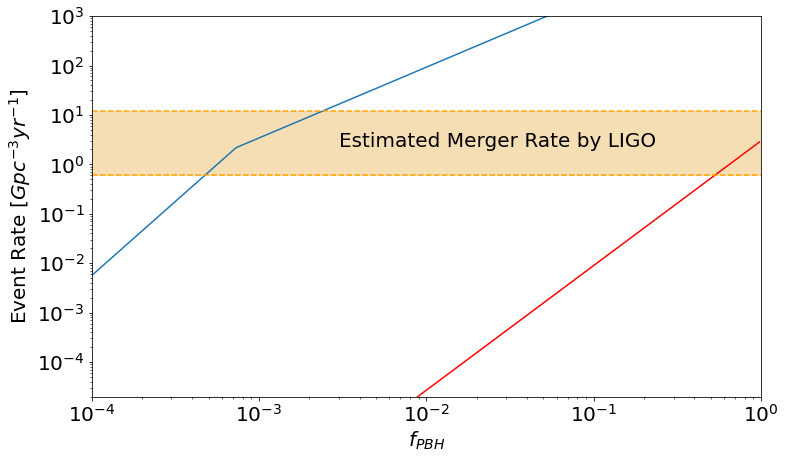

In [4]:
fig= pl.figure(figsize=(12,7))
pl.plot(f_pbh, E_array, "-")
pl.plot(f_pbh, E_array2, "-", color="red")
pl.ylim(0.00002,1000)
pl.xlim(0.0001,1.0)
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.xscale("log")
pl.yscale("log")
pl.xlabel("$f_{PBH}$", fontsize=20)
pl.ylabel("Event Rate [$Gpc^{-3} yr^{-1}$]", fontsize=20)
pl.axhline(0.6, color="orange", linestyle="dashed")
pl.annotate("Estimated Merger Rate by LIGO", xy=(0.003,2.3), size="20")
pl.axhline(12.0, color="orange", linestyle="dashed")
pl.axhspan(0.6, 12.0, color="wheat")
pl.savefig('Merger_Rate.png', dpi=300, bbox_inches='tight')
pl.show()

In [5]:
z_22=64.900e6
H_t = (1/cosmo.H(z_22)).to(u.s)
rH = c/cosmo.H(z_22)
print(H_t)
print(rH.to(u.AU))
#print(rH.to(u.km))

11325.813150912372 s
22.696802751756984 AU


In [6]:
l_pbh = 22*u.AU #(Mpbh/(fpbh*Omega_DM*rho_c0))**(1/3)
z_20=64.900e6
M_pbh=1.0*const.M_sun
Qc = (3/170)*((c**5)/(M_pbh**(3)*(G**3)))
f = ((1/(l_pbh*(1+z_20))**(3))*(M_pbh/(Omega_DM*rho_c0))).to(u.AU**5/u.AU**5)
e=0.99988
#f=1.0
npbh = (f*Omega_DM*rho_c0)/M_pbh
print("Masses: ", (M_pbh/const.M_sun)*u.M_sun)
print("Separation: ", l_pbh)
print("Fpbh: ", f)
#print("Q: ", Qc)

#Q = (3/170)*c**5/(Mpbh**(3)*(G**3))
#t_coal1 = Qc * (l_pbh**(4)) * (1-(e**(2)))**(7/2)#((4*math.pi*npbh/3)**(2)*((1+z_eq)*M_pbh*l_pbh/(rho_c0*Omega_DM))**(3/2))**(7/2)
#print(t_coal1.to(u.Gyr))
#print(prueba.to(u.Gyr))


#x_b = (1/(1+z_eq))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
#prueba = Q*(lpbh**(4))*((lpbh*(1+z_eq))**(3/2) * (rho_c01*Omega_DM/Mpbh)**(1/2))**(7/2)
#x_b = (1/(1+z_eq))*(M_pbh/(f*rho_c0*Omega_DM))**(1/3)
t_coal2 = l_pbh**(4) * Qc * (1-(e**2))**(7/2)#((f*l_pbh/x_b)**(21/4))
print(t_coal2.to(u.Gyr))
#print(prueba.to(u.Gyr))

Masses:  1.0 solMass
Separation:  22.0 AU
Fpbh:  9.102581611063082e-05
14.553836501429032 Gyr


In [14]:
f=1.0
M_pbh=1.0*const.M_sun
e=np.arange(1.0,0.90,-0.0001)
Qc = (3/170)*((c**5)/(M_pbh**(3)*(G**3)))
l_pbh = ((M_pbh/(f*Omega_DM*rho_c0))**(1/3)).to(u.AU)
etha = (l_pbh*H0/c).to(u.AU/u.AU)
z1 = (-(etha**(2) * Omega_M) + math.sqrt(((etha**(2))*Omega_M)**(2) + (4*(etha**(2))*Omega_R)))/(2*etha**(2)*Omega_R)
#z2 = (-(etha**(2) * Omega_M) - math.sqrt((etha**(2)*Omega_M)**(2) + (4*(etha**(2))*Omega_R)))/(2*etha**(2)*Omega_R)
lpbh_z = (l_pbh*(1/(1+z1)))
print("input:")
print("\n")
print("Fraction PBHs:\t", f)
print("Masses PBHs:\t", M_pbh*u.M_sun/const.M_sun)
print("Redshift:\t %.0f" %z1)
print("l_PBH(z):\t", lpbh_z)
print("Hubble Time:\t",(1/cosmo.H(z1)).to(u.s))
print("\n")
print("e(value)|\t Coalesence's Time")
print("--------------------------------------------")
t_array = []
for i in e:
    t_coal= (lpbh_z**(4) * Qc * (1-(i**2))**(7/2)).to(u.Gyr)
    t_array.append(t_coal)
    print("%.4f" %i, "\t|\t", t_coal)

input:


Fraction PBHs:	 1.0
Masses PBHs:	 1.0 solMass
Redshift:	 1552570891
l_PBH(z):	 0.04136859824079727 AU
Hubble Time:	 19.790956454368583 s


e(value)|	 Coalesence's Time
--------------------------------------------
1.0000 	|	 0.0 Gyr
0.9999 	|	 9.612820423921862e-11 Gyr
0.9998 	|	 1.0873761595397886e-09 Gyr
0.9997 	|	 4.4938979152239954e-09 Gyr
0.9996 	|	 1.2297951215543213e-08 Gyr
0.9995 	|	 2.6849845610885832e-08 Gyr
0.9994 	|	 5.081595964673303e-08 Gyr
0.9993 	|	 8.714407592342366e-08 Gyr
0.9992 	|	 1.3903804525592728e-07 Gyr
0.9991 	|	 2.0993818976657862e-07 Gyr
0.9990 	|	 3.0350554320069014e-07 Gyr
0.9989 	|	 4.236088102303738e-07 Gyr
0.9988 	|	 5.743133370593464e-07 Gyr
0.9987 	|	 7.598716201618556e-07 Gyr
0.9986 	|	 9.847150229454882e-07 Gyr
0.9985 	|	 1.253446461832085e-06 Gyr
0.9984 	|	 1.5708338845476908e-06 Gyr
0.9983 	|	 1.9418044057958467e-06 Gyr
0.9982 	|	 2.3714389956549428e-06 Gyr
0.9981 	|	 2.8649676380306556e-06 Gyr
0.9980 	|	 3.427764892875601e-06 Gyr
0.9979 	

0.9780 	|	 0.01460808328644377 Gyr
0.9779 	|	 0.01483918203757843 Gyr
0.9778 	|	 0.015072856430974758 Gyr
0.9777 	|	 0.015309123129237023 Gyr
0.9776 	|	 0.015547998823251715 Gyr
0.9775 	|	 0.015789500232065073 Gyr
0.9774 	|	 0.016033644102760026 Gyr
0.9773 	|	 0.01628044721033381 Gyr
0.9772 	|	 0.016529926357577426 Gyr
0.9771 	|	 0.016782098374955097 Gyr
0.9770 	|	 0.017036980120483682 Gyr
0.9769 	|	 0.01729458847961409 Gyr
0.9768 	|	 0.01755494036511251 Gyr
0.9767 	|	 0.017818052716943155 Gyr
0.9766 	|	 0.01808394250215008 Gyr
0.9765 	|	 0.018352626714741745 Gyr
0.9764 	|	 0.01862412237557469 Gyr
0.9763 	|	 0.0188984465322379 Gyr
0.9762 	|	 0.019175616258939134 Gyr
0.9761 	|	 0.01945564865639041 Gyr
0.9760 	|	 0.019738560851694675 Gyr
0.9759 	|	 0.020024369998233756 Gyr
0.9758 	|	 0.020313093275555336 Gyr
0.9757 	|	 0.020604747889261955 Gyr
0.9756 	|	 0.02089935107090065 Gyr
0.9755 	|	 0.021196920077851532 Gyr
0.9754 	|	 0.021497472193219264 Gyr
0.9753 	|	 0.021801024725723293 Gyr
0.9

0.9528 	|	 0.20203240123987373 Gyr
0.9527 	|	 0.20349801742970489 Gyr
0.9526 	|	 0.20497105726420375 Gyr
0.9525 	|	 0.20645154181115966 Gyr
0.9524 	|	 0.20793949214798796 Gyr
0.9523 	|	 0.20943492936167768 Gyr
0.9522 	|	 0.21093787454875124 Gyr
0.9521 	|	 0.21244834881521515 Gyr
0.9520 	|	 0.21396637327651508 Gyr
0.9519 	|	 0.21549196905748982 Gyr
0.9518 	|	 0.21702515729232577 Gyr
0.9517 	|	 0.2185659591245116 Gyr
0.9516 	|	 0.2201143957067925 Gyr
0.9515 	|	 0.2216704882011243 Gyr
0.9514 	|	 0.22323425777863187 Gyr
0.9513 	|	 0.22480572561955756 Gyr
0.9512 	|	 0.22638491291322302 Gyr
0.9511 	|	 0.22797184085798117 Gyr
0.9510 	|	 0.2295665306611695 Gyr
0.9509 	|	 0.23116900353907016 Gyr
0.9508 	|	 0.23277928071686266 Gyr
0.9507 	|	 0.234397383428579 Gyr
0.9506 	|	 0.2360233329170636 Gyr
0.9505 	|	 0.2376571504339232 Gyr
0.9504 	|	 0.23929885723948613 Gyr
0.9503 	|	 0.24094847460276095 Gyr
0.9502 	|	 0.24260602380138646 Gyr
0.9501 	|	 0.2442715261215944 Gyr
0.9500 	|	 0.2459450028581622

0.9071 	|	 1.9892253197633425 Gyr
0.9070 	|	 1.9963633742063907 Gyr
0.9069 	|	 2.003518915586094 Gyr
0.9068 	|	 2.010691965894231 Gyr
0.9067 	|	 2.0178825471190316 Gyr
0.9066 	|	 2.025090681245143 Gyr
0.9065 	|	 2.0323163902536185 Gyr
0.9064 	|	 2.039559696121895 Gyr
0.9063 	|	 2.0468206208237727 Gyr
0.9062 	|	 2.0540991863294176 Gyr
0.9061 	|	 2.0613954146053124 Gyr
0.9060 	|	 2.068709327614255 Gyr
0.9059 	|	 2.076040947315349 Gyr
0.9058 	|	 2.0833902956639774 Gyr
0.9057 	|	 2.090757394611771 Gyr
0.9056 	|	 2.098142266106615 Gyr
0.9055 	|	 2.10554493209262 Gyr
0.9054 	|	 2.1129654145101027 Gyr
0.9053 	|	 2.1204037352955707 Gyr
0.9052 	|	 2.127859916381701 Gyr
0.9051 	|	 2.1353339796973385 Gyr
0.9050 	|	 2.1428259471674482 Gyr
0.9049 	|	 2.150335840713136 Gyr
0.9048 	|	 2.15786368225159 Gyr
0.9047 	|	 2.1654094936960995 Gyr
0.9046 	|	 2.1729732969560205 Gyr
0.9045 	|	 2.1805551139367494 Gyr
0.9044 	|	 2.188154966539721 Gyr
0.9043 	|	 2.1957728766624007 Gyr
0.9042 	|	 2.203408866198235 

In [36]:
x_barra = (1/((1+z_eq)*(f**(1/3))))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
T = ((x_barra**4)*(Qc)/(f**4)).to(u.Gyr)
tc = (Q*(x_barra**4)*(f**(25/3))).to(u.Gyr)
e_max = math.sqrt(1-(f**(3/2)*(lpbh_z/x_barra)**(3/2)))
print(e_max)
#print((lpbh_z/x_barra).to(u.AU/u.AU))
for i in t_array:
    if i<tc:
        e_upper = math.sqrt(1-((i/T)**(6/36)))
        print("+", e_upper)
    if i>=tc:
        e_upper = math.sqrt(1 - ((f**2)*(i/tc)**(2/7)))
        print("*", e_upper)


0.9999999997025967
+ 1.0
+ 0.9999997239756163
+ 0.9999995864427473
+ 0.9999994761066351
+ 0.9999993804003277
+ 0.9999992942849661
+ 0.9999992151154573
+ 0.9999991412921853
+ 0.9999990717576165
+ 0.9999990057680669
+ 0.9999989427762322
+ 0.999998882365008
+ 0.9999988242075796
+ 0.9999987680420374
+ 0.9999987136545228
+ 0.9999986608676359
+ 0.9999986095322215
+ 0.999998559521401
+ 0.9999985107261398
+ 0.9999984630518928
+ 0.9999984164160228
+ 0.9999983707457846
+ 0.9999983259767286
+ 0.9999982820514235
+ 0.9999982389184219
+ 0.9999981965314152
+ 0.9999981548485359
+ 0.9999981138317788
+ 0.9999980734465151
+ 0.9999980336610839
+ 0.9999979944464438
+ 0.9999979557758775
+ 0.9999979176247367
+ 0.9999978799702224
+ 0.9999978427911951
+ 0.9999978060680084
+ 0.9999977697823644
+ 0.9999977339171866
+ 0.9999976984565071
+ 0.9999976633853679
+ 0.9999976286897329
+ 0.9999975943564093
+ 0.9999975603729779
+ 0.9999975267277305
+ 0.9999974934096131
+ 0.9999974604081764
+ 0.9999974277135288
+ 0.9999973

+ 0.9999880547459994
+ 0.9999880445522099
+ 0.9999880343657153
+ 0.9999880241865007
+ 0.9999880140145515
+ 0.999988003849853
+ 0.9999879936923906
+ 0.9999879835421495
+ 0.9999879733991153
+ 0.9999879632632734
+ 0.9999879531346095
+ 0.9999879430131092
+ 0.9999879328987582
+ 0.999987922791542
+ 0.9999879126914465
+ 0.9999879025984577
+ 0.9999878925125611
+ 0.9999878824337429
+ 0.9999878723619889
+ 0.9999878622972853
+ 0.9999878522396181
+ 0.9999878421889732
+ 0.999987832145337
+ 0.9999878221086957
+ 0.9999878120790355
+ 0.9999878020563427
+ 0.9999877920406037
+ 0.9999877820318049
+ 0.9999877720299327
+ 0.9999877620349736
+ 0.9999877520469143
+ 0.9999877420657411
+ 0.999987732091441
+ 0.9999877221240004
+ 0.9999877121634062
+ 0.9999877022096451
+ 0.9999876922627039
+ 0.9999876823225695
+ 0.9999876723892288
+ 0.9999876624626688
+ 0.9999876525428766
+ 0.999987642629839
+ 0.9999876327235432
+ 0.9999876228239764
+ 0.9999876129311257
+ 0.9999876030449784
+ 0.9999875931655217
+ 0.99998758329274

In [117]:
#(1+z1)**(2)*((etha**(2)*Omega_R)*(1+z1)**(2) + (etha**(2)*Omega_M)*(1+z1) - 1)*etha**(2)*Omega_lmb

<Quantity 1.05854159e-05>

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 2.709917637739207e+44 Gyr || 1.257832344734056e-05 Gyr || 0.00015088963286361739
0.00010964781961431851 || 1.658145964419881e+44 Gyr || 2.396750122674349e-05 Gyr || 0.00019891127530076604
0.00012022644346174131 || 1.0145873073897966e+44 Gyr || 4.5669132095295666e-05 Gyr || 0.0002622161290400834
0.00013182567385564074 || 6.208062657961598e+43 Gyr || 8.702073723106056e-05 Gyr || 0.0003456681790652664
0.0001445439770745928 || 3.7985929534569276e+43 Gyr || 0.00016581459644198786 Gyr || 0.0004556794063573102
0.00015848931924611142 || 2.3242852434080376e+43 Gyr || 0.0003159531999851366 Gyr || 0.0006007024480519078
0.00017378008287493763 || 1.4221849929479734e+43 Gyr || 0.000602036411286464 Gyr || 0.0007918800500117574
0.00019054607179632481 || 8.702073723106066e+42 Gyr || 0.0011471567324899228 Gyr || 0.0010439012120563842
0.0002089296130854041 || 5.324629879928936e+42 Gyr || 0.0021858620911066238 Gyr || 0.0013761298071805301
0.000229086765276777

0.20892961308540536 || 5.3246298799287686e+26 Gyr || 2.185862091106728e+18 Gyr || 659.8599702739702
0.22908676527677888 || 3.258037596596165e+26 Gyr || 4.16507434948887e+18 Gyr || 768.0645311833899
0.25118864315095973 || 1.993529920426344e+26 Gyr || 7.936385560347367e+18 Gyr || 894.0125893674241
0.27542287033381857 || 1.2198022354889533e+26 Gyr || 1.5122470927852648e+19 Gyr || 1040.613740441516
0.30199517204020376 || 7.463732941543405e+25 Gyr || 2.8815274311564485e+19 Gyr || 1211.2546977764082
0.3311311214825935 || 4.566913209529412e+25 Gyr || 5.49063732780216e+19 Gyr || 1409.8775304577669
0.36307805477010396 || 2.79440548405546e+25 Gyr || 1.0462193744709716e+20 Gyr || 1641.0707306845277
0.3981071705535002 || 1.709842436467903e+25 Gyr || 1.9935299204265207e+20 Gyr || 1910.1752143991885
0.4365158322401692 || 1.0462193744708774e+25 Gyr || 3.7985929534571296e+20 Gyr || 2223.407703785675
0.4786300923226419 || 6.40161313213952e+24 Gyr || 7.238069656344564e+20 Gyr || 2588.0043419613294
0.524

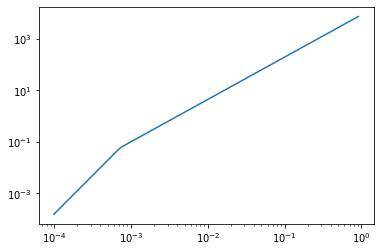

In [21]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*c**5/(Mpbh**(3)*(G**3))
E_array=[]
for i in f_pbh:
    x_barra = (1/((1+z_eq)*(i**(1/3))))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
    T = (x_barra**4)*(Q)/(i**4)
    tc = Q*(x_barra**4)*(i**(25/3))
    if t<tc:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=tc:
        e_up = (1 - ((i**2)*(t/tc)**(2/7)))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,tc.to(u.Gyr), "||", E_rate.value)
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 1.3036174803236127e+41 Gyr || 0.28460532622063944 Gyr || 0.002647503972603583
0.00010964781961431851 || 7.976582144205501e+40 Gyr || 0.5423042692365446 Gyr || 0.003490089952239533
0.00012022644346174131 || 4.880715674928167e+40 Gyr || 1.0333394822140007 Gyr || 0.004600834597707772
0.00013182567385564074 || 2.986415117255989e+40 Gyr || 1.9689877916792586 Gyr || 0.006065081211411728
0.0001445439770745928 || 1.8273294013805395e+40 Gyr || 3.751828891194038 Gyr || 0.007995334176835367
0.00015848931924611142 || 1.1181073662049556e+40 Gyr || 7.148962572689839 Gyr || 0.010539903155623576
0.00017378008287493763 || 6.841481789858412e+39 Gyr || 13.622067356449996 Gyr || 0.013894298358632717
0.00019054607179632481 || 4.186169816574173e+39 Gyr || 25.956314245164883 Gyr || 0.016258368779976846
0.0002089296130854041 || 2.561435997560299e+39 Gyr || 49.45873717727157 Gyr || 0.018924434735351516
0.00022908676527677748 || 1.5672929329386384e+39 Gyr || 94.241

0.22908676527677888 || 1.567292932938588e+23 Gyr || 9.424168085136403e+22 Gyr || 1944.973477450466
0.25118864315095973 || 9.58996102178225e+22 Gyr || 1.7957382085710343e+23 Gyr || 2263.911681262891
0.27542287033381857 || 5.867910871445652e+22 Gyr || 3.421708616177802e+23 Gyr || 2635.1494901093142
0.30199517204020376 || 3.590460682480538e+22 Gyr || 6.519931356443182e+23 Gyr || 3067.2629744847904
0.3311311214825935 || 2.1969331496104684e+22 Gyr || 1.242347308351933e+24 Gyr || 3570.2344936991612
0.36307805477010396 || 1.344260720471918e+22 Gyr || 2.3672439941319815e+24 Gyr || 4155.6832927721325
0.3981071705535002 || 8.22527023602915e+21 Gyr || 4.5106904406529165e+24 Gyr || 4837.133910310858
0.4365158322401692 || 5.032883087735841e+21 Gyr || 8.594943445556483e+24 Gyr || 5630.3285968852415
0.4786300923226419 || 3.079523401415417e+21 Gyr || 1.6377327108623547e+25 Gyr || 6553.590959711367
0.5248074602497765 || 1.8843005518992722e+21 Gyr || 3.120635347071681e+25 Gyr || 7628.249232411595
0.5754

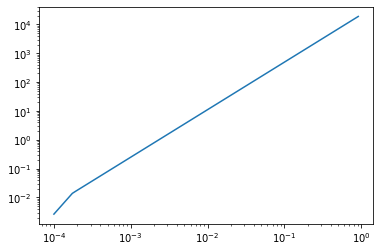

In [23]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
#f_pbh = np.arange(0.0001, 1.0, 0.001)
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*(c**5/((Mpbh**(3))* (G**3)))
E_array=[]
for i in f_pbh:
    T = Q*(3*((4*math.pi/3)*(i*Omega_DM*rho_c0/Mpbh))**(-1/3)/(4*math.pi*i*(1+z_eq)))**4
    t_c = T*((4*math.pi*i/3)**(37/3))
    if t<t_c:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=t_c:
        e_up = (1 - (((4*np.pi*i/3)**2) * (t/t_c)**(2/7)))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,t_c.to(u.Gyr), "||", E_rate.value)
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

In [3]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*(c**5/((Mpbh**(3))* (G**3)))
E_array=[]
for i in f_pbh:
    T = Q*(3*((4*math.pi/3)*(i*Omega_DM*rho_c0/Mpbh))**(-1/3)/(4*math.pi*i*(1+z_eq)))**4
    t_c = T*((4*math.pi*i/3)**(37/3))
    if t<t_c:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=t_c:
        e_up = (1 - (4*math.pi*i/3)**2 * (t/t_c)**(2/7))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,t_c.to(u.Gyr), "||", E_rate.value)

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 1.3036174803236127e+41 Gyr || 0.28460532622063944 Gyr || 0.002647503972603583
0.00010964781961431851 || 7.976582144205501e+40 Gyr || 0.5423042692365446 Gyr || 0.003490089952239533
0.00012022644346174131 || 4.880715674928167e+40 Gyr || 1.0333394822140007 Gyr || 0.004600834597707772
0.00013182567385564074 || 2.986415117255989e+40 Gyr || 1.9689877916792586 Gyr || 0.006065081211411728
0.0001445439770745928 || 1.8273294013805395e+40 Gyr || 3.751828891194038 Gyr || 0.007995334176835367
0.00015848931924611142 || 1.1181073662049556e+40 Gyr || 7.148962572689839 Gyr || 0.010539903155623576
0.00017378008287493763 || 6.841481789858412e+39 Gyr || 13.622067356449996 Gyr || 0.013894298358632717
0.00019054607179632481 || 4.186169816574173e+39 Gyr || 25.956314245164883 Gyr || 0.016258368779976846
0.0002089296130854041 || 2.561435997560299e+39 Gyr || 49.45873717727157 Gyr || 0.018924434735351516
0.00022908676527677748 || 1.5672929329386384e+39 Gyr || 94.241

0.3311311214825935 || 2.1969331496104684e+22 Gyr || 1.242347308351933e+24 Gyr || 3570.2344936991612
0.36307805477010396 || 1.344260720471918e+22 Gyr || 2.3672439941319815e+24 Gyr || 4155.6832927721325
0.3981071705535002 || 8.22527023602915e+21 Gyr || 4.5106904406529165e+24 Gyr || 4837.133910310858
0.4365158322401692 || 5.032883087735841e+21 Gyr || 8.594943445556483e+24 Gyr || 5630.3285968852415
0.4786300923226419 || 3.079523401415417e+21 Gyr || 1.6377327108623547e+25 Gyr || 6553.590959711367
0.5248074602497765 || 1.8843005518992722e+21 Gyr || 3.120635347071681e+25 Gyr || 7628.249232411595
0.5754399373371614 || 1.1529669065856013e+21 Gyr || 5.946248068932695e+25 Gyr || 8879.12894533541
0.6309573444801981 || 7.05478054624395e+20 Gyr || 1.133034211461608e+26 Gyr || 10335.126374478039
0.691830970918942 || 4.3166831824384976e+20 Gyr || 2.15895218204856e+26 Gyr || 12029.876011840912
0.7585775750291898 || 2.641294591008672e+20 Gyr || 4.113798574854562e+26 Gyr || 14002.527470829655
0.831763771

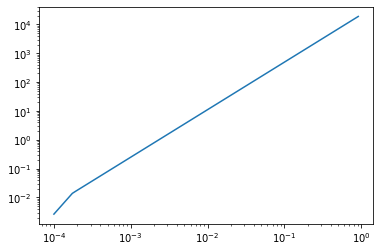

In [4]:
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

In [1]:
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
E_array=[]
for i in f_pbh:
    l_pbh = l(n_pbh)
    n_pbh = n(i)
    Q = (3/85)*(((c/c.value)**5)/(G**3*m1*m2*(m1+m2)))
    y_max = (((4*math.pi)/3)*n_pbh)**(-1/3)
    T = (Q*(((3*y_max)/(4*math.pi*i*(1+z_eq)))**4)).to(u.Gyr)
    t_c = (T * ((4*math.pi * i)/ 3)**(12.3)).to(u.Gyr)
    #E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
    #E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    #E_array.append(E_R.value)
    #print("%.6f" %i,"|\t", T,"|\t", t_c,"|")#, E_Rate.to(1/(u.Gpc**3 * u.yr)))

fpbh 			  T 				   t_c 				   E_Rate


NameError: name 'u' is not defined

In [49]:
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
m1=30*const.M_sun#24.5*const.  
m2=30*const.M_sun#18.3*const.M_sun
E_array=[]
for i in f_pbh:
    l_pbh = l(n_pbh)
    n_pbh = n(i)
    Q = (3/85)*(((c/c.value)**5)/(G**3*m1*m2*(m1+m2)))
    y_max = (((4*math.pi)/3)*n_pbh)**(-1/3)
    T = (Q*(((3*y_max)/(4*math.pi*i*(1+z_eq)))**4)).to(u.Gyr)
    t_c = (T * ((4*math.pi * i)/ 3)**(12.3)).to(u.Gyr)
    if t < t_c:
        e_up = math.sqrt(1 - (t/T)**(6/37))
        E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
        E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    if t >= t_c:
        e_up = math.sqrt(1 - (4*math.pi*i/3)**2 * (t/t_c)**(2/7))
        E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
        E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_R.value)
    print("%.6f" %i,"|\t", T,"|\t", t_c,"|", E_Rate.to(1/(u.Gpc**3 * u.yr)))

fpbh 			  T 				   t_c 				   E_Rate


ValueError: math domain error